#### Import Dependencies

In [ ]:
import pandas as pd
from io import StringIO
import requests
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Load Data into DataFrames

In [ ]:
fake_url="https://raw.githubusercontent.com/Shannon-Watts/fake_news_ML/main/data/kaggle/Fake.csv"
fake_request = requests.get(fake_url).text
fake_df = pd.read_csv(StringIO(fake_request))
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_url= "https://raw.githubusercontent.com/Shannon-Watts/fake_news_ML/main/data/kaggle/True.csv"
true_request = requests.get(true_url).text
true_df = pd.read_csv(StringIO(true_request))
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#### Data Exploration

In [ ]:
fake_df.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [ ]:

true_df.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [ ]:
fake_df['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
true_df['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [ ]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
fake_df.duplicated().sum()

3

In [ ]:
true_df.duplicated().sum()

206

In [ ]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake_df.shape

(23481, 4)

In [ ]:
true_df.shape

(21417, 4)

#### Visualise Data before preprocessing

In [ ]:
# Wordclouds
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(dataframe=None, column=None):

  comment_words = ''
  stopwords = set(STOPWORDS)
  # iterate through the csv file
  for val in dataframe[column]:
      
      # typecaste each val to string
      val = str(val)
  
      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  # wordcloud.recolor(color_func = grey_color_func)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()


In [ ]:
# generate_wordcloud(dataframe=merged_df, column='text')

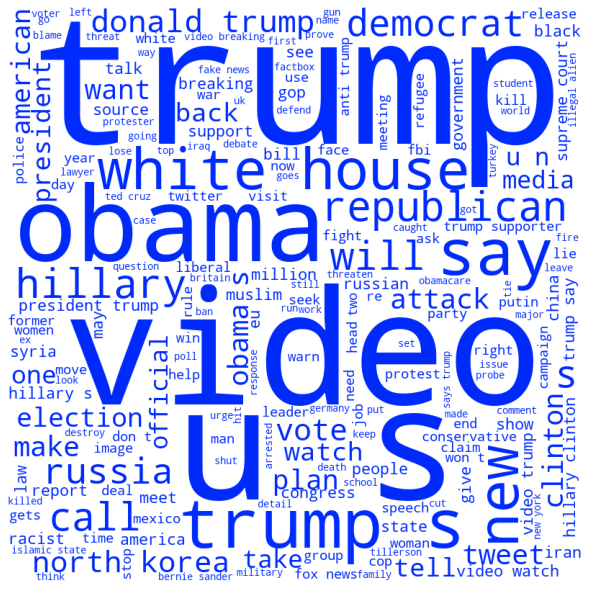

In [ ]:
generate_wordcloud(dataframe=merged_df, column='title')

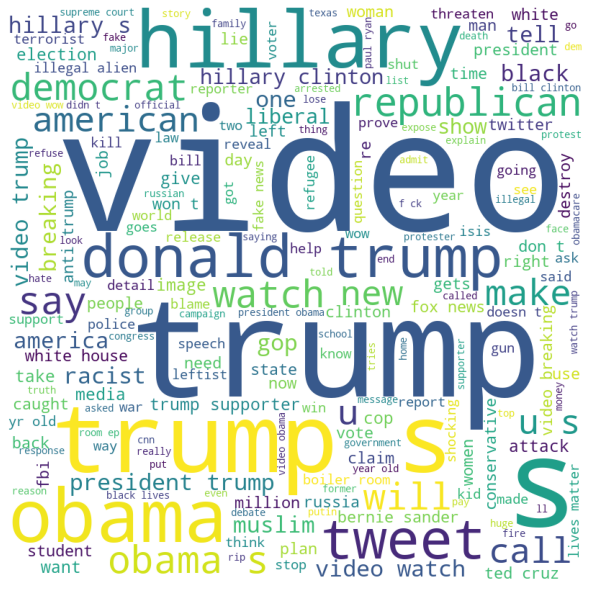

In [ ]:
generate_wordcloud(dataframe=merged_df.loc[merged_df['class']==0], column='title')

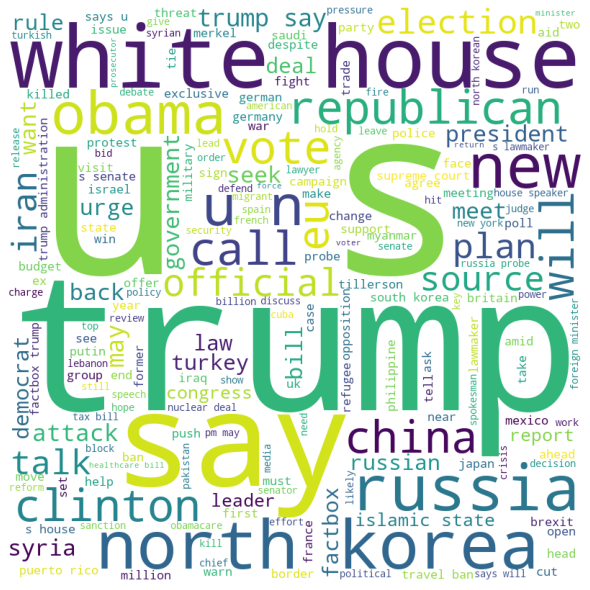

In [ ]:
generate_wordcloud(dataframe=merged_df.loc[merged_df['class']==1], column='title')

In [ ]:
# Word Lengths Plot:

merged_df['title_length'] = merged_df.title.apply(lambda x: len(x))

In [ ]:
def plot_density_hist(data=None, column=None, title=None):
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  sns.histplot(data=data, x=column).set(title=title)

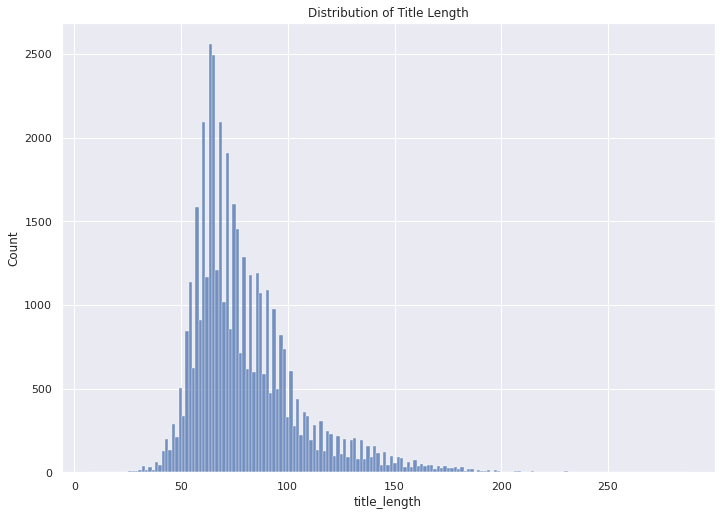

In [ ]:
plot_density_hist(data=merged_df, column='title_length', title='Distribution of Title Length')

In [ ]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', merged_df['title'].apply(len).mean())
print('Min Length',  merged_df['title'].apply(len).min())
print('Max Length',  merged_df['title'].apply(len).max())

#plotting the frequency of characters on a histogram
import seaborn as sns

x =  merged_df['title'].apply(len).plot.hist()

In [ ]:
merged_df['title_length'].mean()

In [ ]:
# # Date Stuff

# date_play = merged_df[['date', 'class']]

In [ ]:
# date_play['date'] = date_play.date.apply(lambda x: x.strip())
# date_play['month'] = date_play.date.apply(lambda x: x.split(' ')[0])

# # date_play['all_split'] = date_play.date.apply(lambda x: x.split(' '))
# date_play['year'] = date_play.date.apply(lambda x: x.split(' ')[-1])

In [ ]:
# date_play.groupby('month').sum()

In [ ]:
# date_play

In [ ]:
# date_play.isnull().sum()

#### Add `class` column, merge Dataframes, Clean Data

In [ ]:
true_df['class'], fake_df['class'] = 1, 0

merged_df = pd.concat([true_df, fake_df], ignore_index = True, sort = False)

In [ ]:
import copy
news_df = copy.deepcopy(merged_df)

In [ ]:
import re
URLS = r'(https?://\S+)'
news_df['urlcount'] = news_df['date'].apply(lambda x: re.findall(URLS, x)).str.len()

news_df.loc[news_df['urlcount'] > 0]

,title,text,subject,date,class,urlcount
30775,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0,1
36924,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0,1
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0,1
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,1
37257,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,1
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0,1
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0,1
43286,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,1
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,1


In [ ]:
news_df['urlcount'].sum()

9

In [ ]:
news_df.drop(news_df.loc[news_df['urlcount'] > 0].index, inplace=True)

In [ ]:
news_df['urlcount'].sum()

0

In [ ]:
news_df.duplicated().sum()

209

In [ ]:
news_df.drop_duplicates(inplace=True)

In [ ]:
news_df.duplicated().sum()

0

In [ ]:
news_df.columns

Index(['title', 'text', 'subject', 'date', 'class', 'urlcount'], dtype='object')

In [ ]:
news_df.info(memory_usage = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44680 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44680 non-null  object
 1   text      44680 non-null  object
 2   subject   44680 non-null  object
 3   date      44680 non-null  object
 4   class     44680 non-null  int64 
 5   urlcount  44680 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
news_df.shape

(44680, 6)

In [ ]:
news_df['class'].value_counts()

0    23469
1    21211
Name: class, dtype: int64

In [ ]:
news_df['subject'].value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6833
left-news           4457
Government News     1568
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
news_df.drop(['text', 'date', 'subject', 'urlcount'], axis = 1, inplace = True)
news_df

,title,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44896,How to Blow $700 Million: Al Jazeera America F...,0


In [ ]:
news_df.shape

(44680, 2)

In [ ]:
news_df

,title,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44896,How to Blow $700 Million: Al Jazeera America F...,0


In [ ]:
news_df.columns

Index(['title', 'class'], dtype='object')

In [ ]:
# Shuffle the rows randomly
news_df = news_df.sample(frac = 1)

# Data Processing

In [ ]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
news_df.head()

,title,class
17936,Moscow says escalation of tension on Korea pen...,1
8166,Obama paints Trump as no friend of the working...,1
28225,‘Maury’ Show Official Facebook Posts F*CKED U...,0
6641,Trump aide plays down prospect of upending 'on...,1
39088,WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...,0


In [ ]:
def lower_title(x):
  try:
    return x.lower()
  except Exception as e:
    print('Error in lower_title function', str(e))
    print("Error", x)
    return x

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
# Stop words removing
from nltk.corpus import stopwords
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#create an object of class PorterStemmer

def process_text(dataframe=None, column=None):

      porter = PorterStemmer()
      tokenizer = RegexpTokenizer(r'\w+')

      dataframe[column] = dataframe[column].replace('[^a-zA-Z0-9]', '')
      dataframe[column] = dataframe[column].apply(lambda x: lower_title(x))

      dataframe = dataframe.replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
      dataframe[column] = dataframe[column].apply(lambda x:tokenizer.tokenize(x))
      eng_stopwords = stopwords.words('english') 


      # news_df['title'] = news_df['title'].apply(word_tokenize)
      dataframe[column] =dataframe[column].apply(lambda words: [word for word in words if word not in eng_stopwords])
      dataframe[column] = dataframe[column].apply(lambda x : ' '.join([porter.stem(token) for token in x]))

In [ ]:
process_text(dataframe=news_df, column='title')

In [ ]:
news_df

,title,class
17936,moscow says escalation of tension on korea pen...,1
8166,obama paints trump as no friend of the working...,1
28225,‘maury’ show official facebook posts f*cked u...,0
6641,trump aide plays down prospect of upending 'on...,1
39088,watch: hundreds of illegal aliens storm senate...,0
...,...,...
29044,scooby doo’s ‘mystery machine’ involved in cr...,0
29170,conservative christian leader admits liberals...,0
15946,ireland says ongoing failure of northern irela...,1
28004,christian group admits to sending men into wo...,0


In [ ]:
news_df['class'].value_counts

<bound method IndexOpsMixin.value_counts of 17936    1
8166     1
28225    0
6641     1
39088    0
        ..
29044    0
29170    0
15946    1
28004    0
36889    0
Name: class, Length: 44680, dtype: int64>

### Compile, Train and Evaluate the Models

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
x = news_df['title']
y = news_df['class']
X_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
# Vectorize title text to numbers
vec = CountVectorizer(stop_words='english')
X_train = vec.fit_transform(X_train).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
def timer():
  pass

In [ ]:
@timer
def trai():
  pass

In [ ]:
def train_models(classifier_list=None, X_train=None, y_train=None, x_test=None, y_test=None):
  final_results = list()
  for name, classifier in classifier_list:
    print(f'Training {classifier}')
    classifier.fit(X_train, y_train)
    # classifier.predict(y_test)
    # model_accuracy = classifier.score(x_test, y_test)
    # model_loss, model_accuracy = classifier.evaluate(x_test,y_test,verbose=2)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    f1score = f1_score(y_pred, y_test)

    final_results.append((name, accuracy, recall, precision, f1score))
    print(f'Accuracy is ==> {accuracy}')
    # print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')
  
  return pd.DataFrame(final_results, columns=['classifier','accuracy', 'recall', 'precision', 'f1_score'])

In [ ]:
models_list = [
    ('MultinomialNB', MultinomialNB()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('PassiveAggressiveClassifier', PassiveAggressiveClassifier()),
    ('SVC', SVC())
]

In [ ]:
results_df = train_models(classifier_list=models_list, X_train=X_train, y_train=y_train, x_test=x_test, y_test=y_test)
sorted_results = results_df.sort_values(by='accuracy', ascending=True)

Training MultinomialNB()
Accuracy is ==> 0.9404655326768129
Training RandomForestClassifier()
Accuracy is ==> 0.9401074306177261
Training AdaBoostClassifier()
Accuracy is ==> 0.8461951656222023
Training KNeighborsClassifier()
Accuracy is ==> 0.7053715308863026
Training PassiveAggressiveClassifier()
Accuracy is ==> 0.9435989256938228
Training SVC()
Accuracy is ==> 0.9536257833482542


In [53]:
sorted_results = results_df.sort_values(by='accuracy', ascending=False)

In [54]:
sorted_results

,classifier,accuracy,recall,precision,f1_score
5,SVC,0.953626,0.930538,0.975108,0.952302
4,PassiveAggressiveClassifier,0.943599,0.936974,0.944748,0.940845
0,MultinomialNB,0.940466,0.945790,0.927777,0.936697
1,RandomForestClassifier,0.940107,0.924670,0.951348,0.937819
2,AdaBoostClassifier,0.846195,0.772541,0.958137,0.855387
3,KNeighborsClassifier,0.705372,0.821817,0.484443,0.609562


In [106]:
# results_df.plot.bar(x='classifier', y='accuracy', rot=45)
import plotly.express as px

# data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(sorted_results, x='classifier', y='accuracy', text_auto='.2f', 
            title="Fake News Prediction Models Accuracy Score")
fig.show()

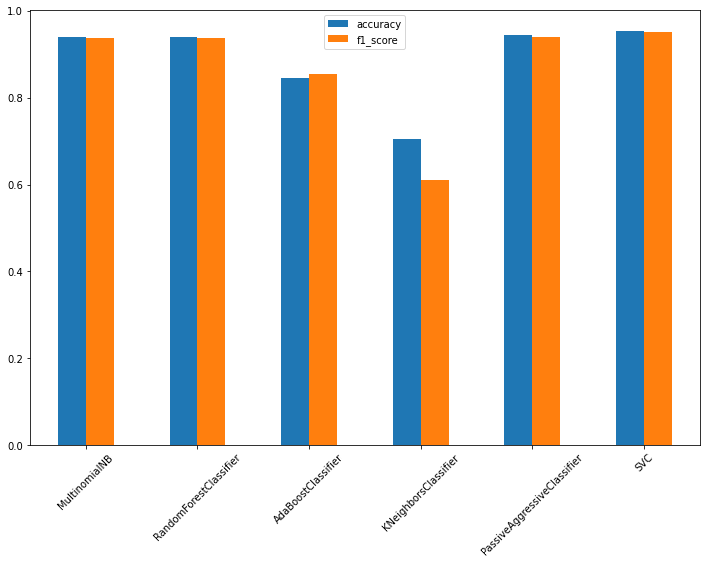

In [121]:
comparison_df = pd.DataFrame({'accuracy': list(results_df['accuracy']),
                   'f1_score': list(results_df['f1_score'])}, index=list(results_df['classifier']))
ax = comparison_df.plot.bar(rot=45, figsize=(12, 8))

In [88]:
comparison_df = comparison_df.sort_values(by='accuracy', ascending=False)
comparison_df

,accuracy,f1_score
SVC,0.953626,0.952302
PassiveAggressiveClassifier,0.943599,0.940845
MultinomialNB,0.940466,0.936697
RandomForestClassifier,0.940107,0.937819
AdaBoostClassifier,0.846195,0.855387
KNeighborsClassifier,0.705372,0.609562


In [118]:
import plotly.graph_objects as go

fig2 = go.Figure(
    data=[
        go.Bar(
            name="accuracy",
            x=sorted_results["classifier"],
            y=sorted_results["accuracy"],
            textposition='auto',
            offsetgroup=0,
        ),
        go.Bar(
            name="f1_score",
            x=sorted_results["classifier"],
            y=sorted_results["f1_score"],
            textposition='auto',
            offsetgroup=1,
        ),
    ],
    layout=go.Layout(
        title="Fake News Prediction Models Scores",
        yaxis_title="Score"
    )
)
fig2.show()

In [100]:
comparison_df

,accuracy,f1_score
SVC,0.953626,0.952302
PassiveAggressiveClassifier,0.943599,0.940845
MultinomialNB,0.940466,0.936697
RandomForestClassifier,0.940107,0.937819
AdaBoostClassifier,0.846195,0.855387
KNeighborsClassifier,0.705372,0.609562
